## End to end Deep Learning Project Using Simple RNN

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [3]:
## Load the imdb dataset

max_features=10000 ##vocabulary size
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_train.shape}, Testing labels shape: {y_test.shape}')

17464789/17464789 [==============================] - 5s 0us/step
Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [4]:
X_train[0],y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [5]:
## Inspect a sample review and its label
sample_review=X_train[0]
sample_label=y_train[0]

print(f"Sample review (as integers):{sample_review}")
print(f'Sample label: {sample_label}')


Sample review (as integers):[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


In [6]:
### MApping of words index back to words(for understanding)
word_index=imdb.get_word_index()
#word_index
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index

1641221/1641221 [==============================] - 2s 1us/step


{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

The code snippet is used to decode a review represented as a sequence of integers back into a human-readable string.

### Explanation:
- **`sample_review`**: This is a list of integers where each integer corresponds to a word in the review. The integers are indices from a vocabulary.
- **`reverse_word_index`**: This is a dictionary that maps integer indices back to words.
- **`i - 3`**: This subtracts 3 from each index because indices 0, 1, and 2 are reserved for special tokens like padding, start of sequence, and unknown words.

### Code Walkthrough:
1. **List comprehension**: Iterates over each integer `i` in `sample_review`.
2. **Lookup**: `reverse_word_index.get(i - 3, '?')` retrieves the word corresponding to the adjusted index `i - 3`. If the index is not found, it returns `'?'`.
3. **Joining**: `' '.join([...])` combines the decoded words into a single string.

### Example:
```python
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
print(decoded_review)
```

This would output the human-readable text of the review.

### Key Points:
- The offset of 3 accounts for reserved indices.
- The code handles unknown words gracefully by using `'?'`.

This method is particularly useful in NLP tasks, such as working with datasets like the IMDB movie reviews.

In [8]:
from tensorflow.keras.preprocessing import sequence

max_len=500

X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [9]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

An **embedding layer** in deep learning, especially in natural language processing (NLP), is a type of neural network layer that maps high-dimensional categorical data, like words, into dense, low-dimensional continuous vectors. These vectors capture the semantic relationships between the data points.

### Key Aspects:
1. **Dimensionality Reduction:** The embedding layer reduces the dimensionality of categorical data, making it easier to work with for neural networks.
2. **Learning Representation:** Unlike one-hot encoding, which creates sparse vectors, embeddings learn to represent similar words with similar vectors.
3. **Dense Vectors:** Each word or category is represented by a dense vector (embedding) of fixed size, where similar meanings tend to cluster together in the vector space.

### Example in NLP:
In the context of text, an embedding layer might convert words into vectors of real numbers. For instance, in a sentiment analysis model:
- "happy" might be mapped to a vector like `[0.1, 0.3, -0.7]`
- "sad" might be mapped to `[0.4, -0.6, -0.2]`

### Implementation Example in Keras:
```python
from tensorflow.keras.layers import Embedding

# Suppose you have a vocabulary size of 5000 words and you want embeddings of size 64
embedding_layer = Embedding(input_dim=5000, output_dim=64, input_length=100)
```

This `Embedding` layer would convert word indices (integers) from sequences of length 100 into 64-dimensional vectors.

### Applications:
- **Text Classification:** Word embeddings help in understanding the context of words.
- **Recommendation Systems:** Items or users can be embedded to find similarities.
- **Image Captioning:** Embeddings can represent different aspects of images.

Embeddings can be pre-trained (like Word2Vec, GloVe) or learned during model training. They are crucial for models that require an understanding of relationships within data.

In [10]:
## Train Simple RNN
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len)) ## Embedding Layers
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
## Create an instance of EarlyStoppping Callback
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [14]:
## Train the model with early sstopping
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/10


625/625 [==============================] - 223s 344ms/step - loss: 0.6589 - accuracy: 0.6715 - val_loss: 0.5044 - val_accuracy: 0.7568
Epoch 2/10
625/625 [==============================] - 173s 277ms/step - loss: 0.4997 - accuracy: 0.7706 - val_loss: 0.4528 - val_accuracy: 0.7896
Epoch 3/10
625/625 [==============================] - 124s 199ms/step - loss: 0.3464 - accuracy: 0.8550 - val_loss: 0.4445 - val_accuracy: 0.8050
Epoch 4/10
625/625 [==============================] - 134s 214ms/step - loss: 0.2385 - accuracy: 0.9032 - val_loss: 0.4105 - val_accuracy: 0.8428
Epoch 5/10
625/625 [==============================] - 122s 195ms/step - loss: 0.2047 - accuracy: 0.9224 - val_loss: 0.4803 - val_accuracy: 0.8154
Epoch 6/10
625/625 [==============================] - 117s 188ms/step - loss: 0.1403 - accuracy: 0.9518 - val_loss: 0.5848 - val_accuracy: 0.7976
Epoch 7/10
625/625 [==============================] - 135s 216ms/step - loss: 0.1277 - accuracy: 0.9545 - val_loss: 0.5658

In [15]:
## Save model file
model.save('simple_rnn_imdb.h5')

c:\Users\Kempsly\Desktop\Python-programming\NLP-DeepLearning\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


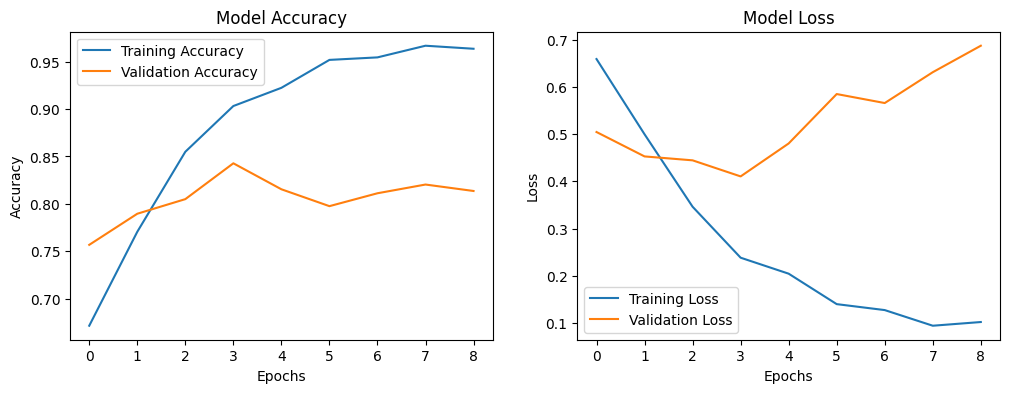

In [16]:
import matplotlib.pyplot as plt



# Plotting Accuracy
plt.figure(figsize=(12, 4))

# Plotting Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.show()
